In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
customers= pd.read_csv('Customer.csv')
product_hierarchy= pd.read_csv('prod_cat_info.csv')
transactions= pd.read_csv('Transactions.csv')

In [3]:
print(customers.shape)
print(product_hierarchy.shape)
print(transactions.shape)

(5647, 4)
(23, 4)
(23053, 10)


In [4]:
customers.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [5]:
product_hierarchy.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [6]:
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [7]:
print(customers.isnull().sum())
print(product_hierarchy.isnull().sum())
print(transactions.isnull().sum())



customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64
prod_cat_code        0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64
transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64


In [8]:
# Merge the datasets

customer_final = transactions.merge(customers, left_on='cust_id', right_on='customer_Id', how='inner')
customer_final = customer_final.merge(product_hierarchy, left_on=['prod_cat_code', 'prod_subcat_code'], 
                                      right_on=['prod_cat_code', 'prod_sub_cat_code'], how='left')

customer_final.drop(columns= ['customer_Id'], inplace= True)
# Display the merged dataset
customer_final.head()


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,1,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,1,Women
2,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,26-09-1981,M,5.0,Footwear,3,Women
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,26-09-1981,M,5.0,Electronics,8,Personal Appliances
4,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,26-09-1981,M,5.0,Books,6,DIY


Exploratory Data Analysis


In [9]:
#  a. Get the column names and their corresponding data types

print(customer_final.dtypes)


transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object


In [10]:
# Top 10 observation
customer_final.head(10)  



,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,1,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,1,Women
2,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,26-09-1981,M,5.0,Footwear,3,Women
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,26-09-1981,M,5.0,Electronics,8,Personal Appliances
4,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,26-09-1981,M,5.0,Books,6,DIY
5,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,5,Computers
6,29258453508,270384,20-02-2014,5,3,5,1497,785.925,8270.925,e-Shop,11-05-1973,F,8.0,Electronics,5,Computers
7,92734514344,270384,26-10-2013,1,4,2,1362,286.020,3010.020,TeleShop,11-05-1973,F,8.0,Bags,1,Mens
8,865952996,270384,6/8/2013,12,6,2,86,18.060,190.060,MBR,11-05-1973,F,8.0,Home and kitchen,12,Tools
9,4116651679,270384,6/8/2013,6,5,1,1343,141.015,1484.015,TeleShop,11-05-1973,F,8.0,Books,6,DIY


In [11]:
#Five-number summary for continuous variables

customer_final.describe()


,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code,prod_sub_cat_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000,23053.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,5.482534,6.149091
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2.863499,3.726372
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,5.000000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,8.000000,10.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,10.000000,12.000000


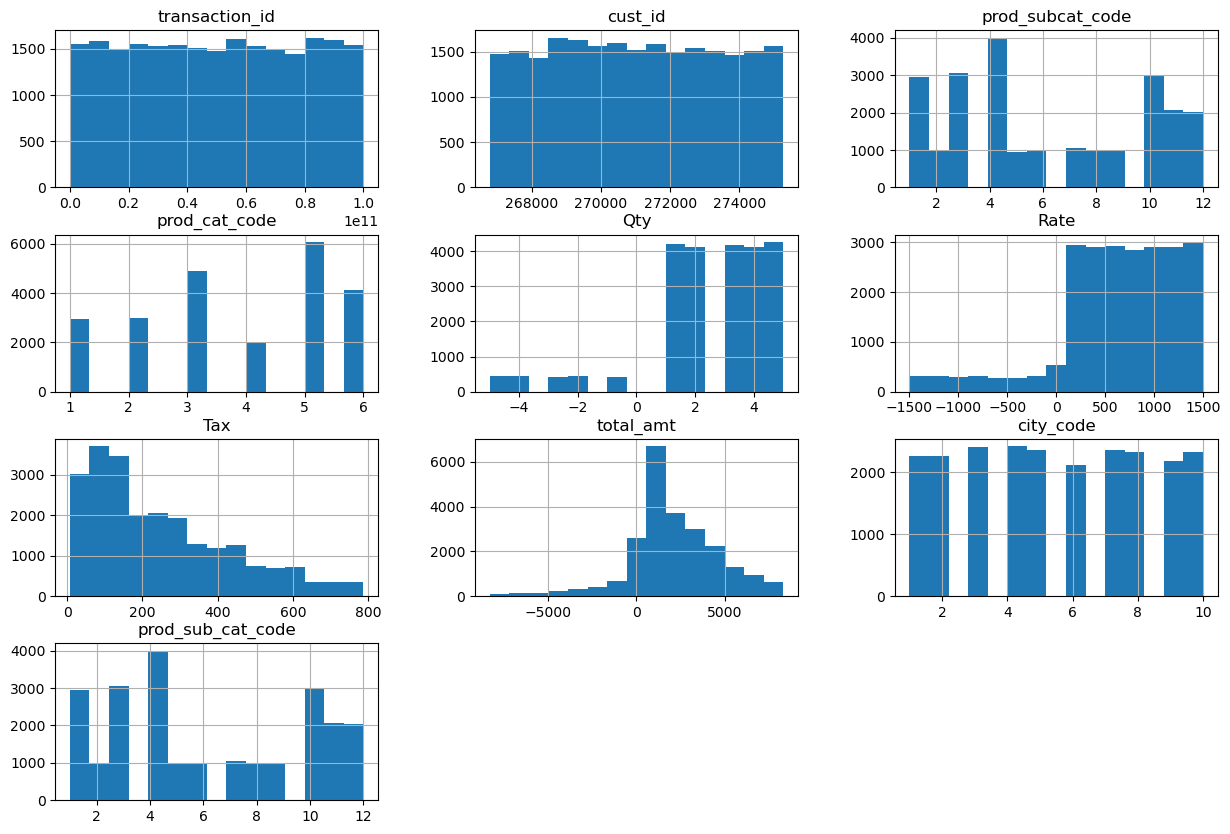

In [12]:
#  Generate histograms for all continuous variables and frequency bars for categorical variables

customer_final.select_dtypes(include='number').hist(bins=15, figsize=(15, 10))
plt.show()


In [13]:

def parse_transaction_date(date_series):
    """
    Parses a pandas Series of transaction dates with mixed formats
    and returns a Series of datetime objects with no nulls.
    """
    # Try format: "DD-MM-YYYY"
    parsed = pd.to_datetime(date_series, format="%d-%m-%Y", errors='coerce')

    # Fill failed parses with format: "MM/DD/YYYY"
    parsed = parsed.fillna(pd.to_datetime(date_series, format="%m/%d/%Y", errors='coerce'))

    # Final fallback: auto-infer format with dayfirst=True
    parsed = parsed.fillna(pd.to_datetime(date_series, dayfirst=True, errors='coerce'))

    # Final check: Fill any remaining nulls with a placeholder or raise error
    if parsed.isna().sum() > 0:
        raise ValueError("Some dates could not be parsed. Please check the input.")

    return parsed


In [14]:
pip install python-dateutil


Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
from dateutil import parser

def robust_parse_dates(date_series):
    parsed_dates = []

    for val in date_series:
        try:
            parsed = parser.parse(val, dayfirst=True)
            parsed_dates.append(parsed)
        except Exception as e:
            print(f"Failed to parse: {val} — {e}")
            raise ValueError(f"Unparsable date found: {val}")

    return pd.Series(parsed_dates)


In [16]:
customer_final['tran_date'] = robust_parse_dates(customer_final['tran_date'])


In [17]:
customer_final['YearMonth'] = customer_final['tran_date'].dt.to_period('M').dt.to_timestamp()


In [18]:
#  Count of transactions where orders were returned

negative_transactions = customer_final[customer_final['total_amt'] < 0]
print(negative_transactions.shape[0])



2177


In [19]:
# Find Total Returns

(customer_final[customer_final['total_amt'] < 0]).Qty.sum()



-6627

In [20]:
# Analyze which product categories are more popular among females vs male customers


popular_by_gender = customer_final.groupby(['Gender', 'prod_cat'])['Qty'].sum().unstack().T
print(popular_by_gender)


Gender               F     M
prod_cat                    
Bags              2362  2346
Books             7070  7587
Clothing          3425  3748
Electronics       5832  6476
Footwear          3716  3555
Home and kitchen  4895  5041


In [21]:
#  City code having the maximum customers and the percentage of customers from that city?

city_customer_count = customer_final.groupby('city_code')['cust_id'].nunique()
max_city = city_customer_count.idxmax()
max_city_percentage = (city_customer_count.max() / city_customer_count.sum()) * 100

print(f"City with max customers: {max_city}, Percentage: {max_city_percentage:.2f}%")



City with max customers: 3.0, Percentage: 10.47%


In [22]:
# Store type selling the maximum products by value and by quantity

store_sales_value = customer_final.groupby('Store_type')['total_amt'].sum().idxmax()
store_sales_quantity = customer_final.groupby('Store_type')['Qty'].sum().idxmax()

print(f"Store type with max sales by value: {store_sales_value}")
print(f"Store type with max sales by quantity: {store_sales_quantity}")


Store type with max sales by value: e-Shop
Store type with max sales by quantity: e-Shop


In [23]:
# Total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

flagship_sales = customer_final[(customer_final['prod_cat'].isin(['Electronics', 'Clothing'])) & 
                                (customer_final['Store_type'] == 'Flagship store')]
total_flagship_sales = flagship_sales['total_amt'].sum()

print(f"Total amount from Electronics and Clothing in Flagship Stores: {total_flagship_sales}")



Total amount from Electronics and Clothing in Flagship Stores: 3409559.27


In [24]:
# Total amount earned from "Male" customers under the "Electronics" category?

male_electronics_sales = customer_final[(customer_final['Gender'] == 'M') & 
                                        (customer_final['prod_cat'] == 'Electronics')]['total_amt'].sum()

print(f"Total amount from Male customers in Electronics: {male_electronics_sales}")



Total amount from Male customers in Electronics: 5703109.425000001


In [25]:
#  Customers having more than 10 unique transactions, after removing all transactions  which have any negative amounts?

valid_transactions = customer_final[customer_final['total_amt'] >= 0]

# Count unique transactions per customer
customers_with_10_transactions = valid_transactions.groupby('cust_id')['transaction_id'].nunique()
customers_over_10 = customers_with_10_transactions[customers_with_10_transactions > 10].count()

print(f"Number of customers with more than 10 unique transactions: {customers_over_10}")


Number of customers with more than 10 unique transactions: 6


In [26]:
# For all customers aged between 25 - 35, find out: total amount spent for “Electronics” and “Books” product categories?

from datetime import datetime  # Import datetime module

customer_final['DOB'] = pd.to_datetime(customer_final['DOB'])
current_year = datetime.now().year
customer_final['age'] = current_year - customer_final['DOB'].dt.year

# Filter customers aged 25-35
age_filtered_customers = customer_final[(customer_final['age'] >= 25) & (customer_final['age'] <= 35)]

# 11a: Total amount spent on Electronics and Books
total_spent = age_filtered_customers[age_filtered_customers['prod_cat'].isin(['Electronics', 'Books'])]['total_amt'].sum()
print(f"Total amount spent on Electronics and Books: {total_spent}")



Total amount spent on Electronics and Books: 2794540.58


C:\Users\karis\AppData\Local\Temp\ipykernel_25432\3388438597.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  customer_final['DOB'] = pd.to_datetime(customer_final['DOB'])


In [27]:
# Total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014

# Total amount spent between 1st Jan 2014 and 1st Mar 2014
date_filtered_customers = age_filtered_customers[(age_filtered_customers['tran_date'] >= '2014-01-01') & 
                                                 (age_filtered_customers['tran_date'] <= '2014-03-01')]

total_spent_in_period = date_filtered_customers['total_amt'].sum()
print(f"Total amount spent between 1st Jan 2014 and 1st Mar 2014: {total_spent_in_period}")


Total amount spent between 1st Jan 2014 and 1st Mar 2014: 313650.935


## Product Demand Prediction (Regression)


In [28]:
customer_final['Month']= customer_final['tran_date'].dt.month

In [29]:
customer_final1= customer_final.dropna()

In [30]:
# Filter only positive sales (ignore returns)

customer_final1 = customer_final1[customer_final['Qty'] > 0].reset_index()


C:\Users\karis\AppData\Local\Temp\ipykernel_25432\558508658.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customer_final1 = customer_final1[customer_final['Qty'] > 0].reset_index()


In [31]:
customer_final1.shape

(20860, 20)

In [32]:
customer_final1['Avg_Selling_Price'] = (customer_final1['total_amt'] - customer_final1['Tax']) / customer_final1['Qty']


In [33]:
customer_final1.head()

,index,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,...,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,YearMonth,age,Month,Avg_Selling_Price
0,1,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,...,1981-09-26,M,5.0,Clothing,1,Women,2014-02-01,44,2,772.0
1,2,36957441426,270351,2013-09-16,3,2,3,361,113.715,1196.715,...,1981-09-26,M,5.0,Footwear,3,Women,2013-09-01,44,9,361.0
2,3,12236277258,270351,2013-03-18,8,3,3,1030,324.450,3414.450,...,1981-09-26,M,5.0,Electronics,8,Personal Appliances,2013-03-01,44,3,1030.0
3,4,13181563739,270351,2011-12-13,6,5,1,1048,110.040,1158.040,...,1981-09-26,M,5.0,Books,6,DIY,2011-12-01,44,12,1048.0
4,6,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,...,1973-05-11,F,8.0,Electronics,5,Computers,2014-02-01,52,2,1497.0


In [34]:
customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'DOB',
       'Gender', 'city_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat',
       'YearMonth', 'age', 'Month'],
      dtype='object')

In [35]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(customer_final1[ ['Store_type', 'Gender']], drop_first=True)

# Concatenate with numerical features
model_data = pd.concat([
    customer_final1[['prod_subcat_code', 'Qty','prod_cat_code','Rate','total_amt','city_code', 'Month', 'Avg_Selling_Price']],
    df_encoded
], axis=1)

# Define target variable (e.g., Qty or total_amt)
target = 'Qty'  # or 'total_amt'

X = model_data.drop(columns=[target])
y = model_data[target]


In [36]:
X.isna().sum()

prod_subcat_code       0
prod_cat_code          0
Rate                   0
total_amt              0
city_code              0
Month                  0
Avg_Selling_Price      0
Store_type_MBR         0
Store_type_TeleShop    0
Store_type_e-Shop      0
Gender_M               0
dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))

RMSE: 0.014481283586232586
R²: 0.99989613516623


In [45]:
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
results_df

,Actual,Predicted
0,3,3.00
1,4,4.00
2,4,4.02
3,5,5.00
4,1,1.00
...,...,...
4167,2,2.00
4168,4,4.00
4169,4,4.00
4170,3,3.00


Text(0.5, 1.0, 'Predicted vs Actual Quantity')

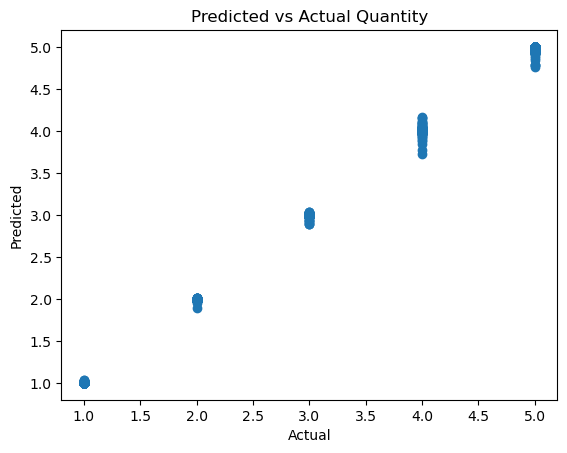

In [199]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Quantity")


In [200]:
# Cross Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, scoring='r2', cv=5)
print("Cross-validated R² scores:", scores)


Cross-validated R² scores: [0.99986541 0.99989388 0.99983989 0.99986707 0.99982987]


Text(0.5, 1.0, 'Top 10 Feature Importances')

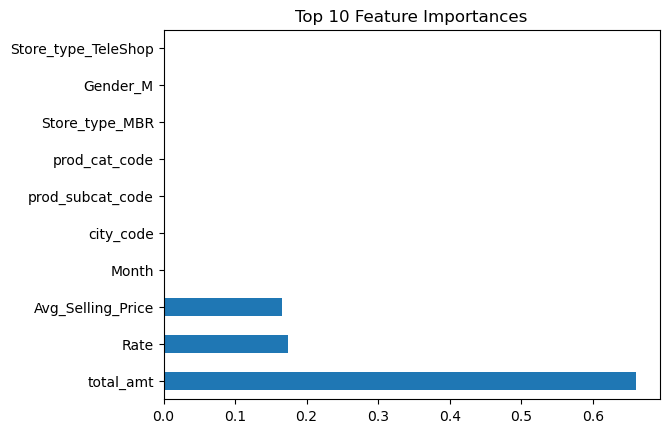

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
